In [202]:
%config InlineBackend.figure_formats = ['svg']

def bar_scale( data, title=None, size=(9,3),
               bar_height=0.5, gradient_strength=0.38, gradient_smoothness=12):
    bar_height = float(bar_height)
    bar_height = max(min(1, bar_height), 0.01)
    gradient_smoothness = int(gradient_smoothness)
    gradient_smoothness = max(min(100, gradient_smoothness), 1)

    import matplotlib.pyplot as plt
    from matplotlib.patches import Polygon
    import matplotlib.colors as mcolors

    plt.rcParams['font.family'] = ['PingFang HK', 'sans-serif']
    plt.rcParams['svg.fonttype'] = 'none'

    fig, ax = plt.subplots(figsize=size)
    max_rows = len(data)
    columns = [[0]*max_rows]
    bar_catlogs = []
    bar_labels = []
    bar_values = []
    uom =[]
    max_columns = 0

    # Re-constract the data by columns for plot. And normalize to 100% for each row of bars.
    for i in range(max_rows):
        rec = data[i]
        bar_catlogs.insert(0, rec[0])
        bar_labels.insert(0, list(rec[1].keys()) )
        values = list(rec[1].values())
        bar_values.insert(0, values )
        s = sum(values)
        for j in range(len(values)):
            if j>max_columns-1:
                columns.append([0]*max_rows)
                max_columns += 1
            columns[j][max_rows-i-1] = values[j] * 100 / s
        uom.insert(0, rec[2])

    # polt the chart by columns
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    y_pos = range(max_rows)
    start = [0] * max_rows
    for c in range(max_columns):
        column = columns[c]
        ax.barh(y_pos, column, left = start, align='center', height=bar_height)
        for r in range(max_rows):
            bar_width = column[r]
            if bar_width > 0:
                key = bar_labels[r][c]
                ax.text(start[r] + bar_width/2, r, key, color='white', va='center', ha='center')
                
                # build the gradient between bars if label matches with catalog name in next row
                if r > 0 and key == bar_catlogs[r-1]:
                    bar_color = colors[c % len(colors)]
                    left_top = start[r]
                    left_bottom = 0
                    '''
                        p1 ----- p2
                        /        |
                       /         |
                      /          |
                    P4 --------- P3
                    '''
                    for j in range(max_columns):
                        bottom_delta = columns[j][r-1]
                        if bottom_delta == 0:
                            continue
                        top_delta = bar_width*bottom_delta/100

                        p1 = (left_top,           r-bar_height/2)
                        p2 = (left_top+top_delta, r-bar_height/2)
                        p3 = (left_bottom+bottom_delta, r-1+bar_height/2)
                        p4 = (left_bottom,              r-1+bar_height/2)
                        left_top += top_delta
                        left_bottom += bottom_delta

                        delta_h = (p1[1] -p4[1]) / gradient_smoothness
                        delta_x_left = (p1[0] - p4[0]) /gradient_smoothness
                        delta_x_right = (p3[0] - p2[0]) /gradient_smoothness

                        c1 = mcolors.hex2color( colors[j % len(colors) ] )
                        c2 = mcolors.hex2color( bar_color )
                        
                        (dR,dG,dB) = tuple( (y-x)/gradient_smoothness for x,y in zip(c1,c2) )
                        for i in range(gradient_smoothness):
                            step_color = mcolors.rgb2hex(( c1[0]+i*dR, c1[1]+i*dG, c1[2]+i*dB  ))
                            polygon = Polygon([
                                ( p4[0]+delta_x_left*(i+1), p4[1]+delta_h*(i+1) ),
                                ( p3[0]-delta_x_right*(i+1), p3[1]+delta_h*(i+1) ),
                                ( p3[0]-delta_x_right*i, p3[1]+delta_h*i ),
                                ( p4[0]+delta_x_left*i, p4[1]+delta_h*i )
                            ])
                            polygon.set_facecolor(step_color)
                            polygon.set_alpha(gradient_strength)
                            ax.add_patch(polygon)
                start[r] += bar_width
                val = sum(bar_values[r][:c+1])
                if val == int(val):
                    val = int(val)
                ax.text(start[r], r-(bar_height/2)-.02, str(val), color='gray', va='top', ha='center', fontsize=8)
            if c+1 == max_columns:
                ax.text(100.2, r-(bar_height/2)+.02, uom[r], color='gray', va='bottom', ha='left', fontsize=8)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(bar_catlogs)
    ax.set_xticklabels([])
    plt.title(title)
    plt.show()



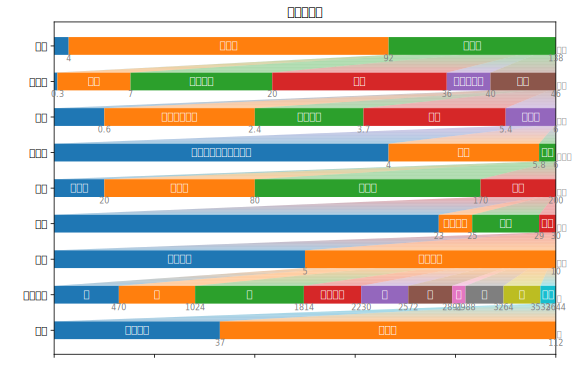

In [205]:
myData = [
    ('宇宙',{'':4, '银河系':88, '太阳系':46},'亿年'),
    ('太阳系',{'':.3, '地球':6.7,'原始生命':13,'氧气':16,'多细胞生物':4,'动物':6},'亿年'),
    ('动物',{'':0.6,'寒武纪大爆发':1.8, '陆地动物':1.3,'恐龙':1.7,'灵长类':.6},'亿年'),
    ('灵长类',{'恐龙灭绝，灵长类繁荣':4, '人猿': 1.8,'人属':0.2},'千万年'),
    ('人属',{'直立人':20,'使用火':60,'原始人':90, '智人': 30},'万年'),
    ('智人',{'':23,'走出非洲':2, '语言':4,'部落':1},'万年'),
    ('部落',{'农业革命':5,'华夏文明':5},'千年'),
    ('华夏文明',{'夏':470,'商':554,'周':790,'秦汉晋隋':416,'唐':342,'宋':319,'元':97,'明':276,'清':268,'中国':112},'年'),
    ('中国',{'中华民国':37,'新中国':75},'年'),
]

bar_scale(myData, title='永远有多远', size=(9,6))
